## Introduction
Welcome to our team project, Budget Blox! We are building a smart budget planner to help young adults compare their spending habits with the everyone else and learn to make smarter decisions.

For the Data Science portion we are:
1. Building Average Spending Benchmarks
    1. Calculate mean and median spending per category across all users.
    2. Output as a JSON file (e.x., { "Food": 400, "Rent": 1200, "Entertainment": 150 }).
2. Compare Individual to Averages
    3. Do a comparison of the given user to an aggregate average across multiple users

Additionally, we are going to try to hit the stretch goals:
1. Visualize user vs average with bar charts or pie charts.
2. Identify “outlier” categories where user spending > 1.5× benchmark.
3. Predict monthly total using linear regression or moving averages.

In [1]:
## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import math
from scipy import stats as sts
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
## Loading data

In [4]:
df_data = pd.read_csv('datasets/synthetic_fraud_data.csv')
display(df_data)
display(df_data.info())

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,...,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820+00:00,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,0,False,0,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464+00:00,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,1,True,0,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762+00:00,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,0,False,0,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466+00:00,Gas,major,Exxon,630.60,AUD,Australia,...,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,0,False,0,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063+00:00,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,1,False,0,False,"{'num_transactions': 218, 'total_amount': 4827...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483761,TX_58a762fa,CUST_11344,377055034743699,2024-10-30 23:59:58.926575+00:00,Retail,online,AliExpress,887.32,SGD,Singapore,...,Safari,web,2e37bb086e754bfaf2ec3806dcac8d98,248.8.111.152,0,False,23,False,"{'num_transactions': 1, 'total_amount': 1521.7...",False
7483762,TX_dabcf671,CUST_38961,373625915641065,2024-10-30 23:59:58.950801+00:00,Grocery,physical,Kroger,356.06,EUR,France,...,Chrome,web,459c67dbfbb15019df8088fc0f2ffe1d,224.123.137.90,0,False,23,False,"{'num_transactions': 0, 'total_amount': 356.06...",False
7483763,TX_ab567eb4,CUST_75576,6702342842796660,2024-10-30 23:59:58.972155+00:00,Grocery,physical,Kroger,391.96,SGD,Singapore,...,Safari,web,337d36a8f5e811564a1dd3c255db01dd,31.196.9.234,0,False,23,False,"{'num_transactions': 0, 'total_amount': 391.96...",False
7483764,TX_5ae61846,CUST_82508,374615717295581,2024-10-30 23:59:58.996608+00:00,Retail,online,eBay,601.71,USD,USA,...,Firefox,web,52874c17f4ab0846fac1aed0c66e8551,188.74.107.8,0,False,23,False,"{'num_transactions': 2, 'total_amount': 1474.5...",False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transaction_id       object 
 1   customer_id          object 
 2   card_number          int64  
 3   timestamp            object 
 4   merchant_category    object 
 5   merchant_type        object 
 6   merchant             object 
 7   amount               float64
 8   currency             object 
 9   country              object 
 10  city                 object 
 11  city_size            object 
 12  card_type            object 
 13  card_present         bool   
 14  device               object 
 15  channel              object 
 16  device_fingerprint   object 
 17  ip_address           object 
 18  distance_from_home   int64  
 19  high_risk_merchant   bool   
 20  transaction_hour     int64  
 21  weekend_transaction  bool   
 22  velocity_last_hour   object 
 23  is_fraud             bool   
dty

None

In [5]:
## Cleaning and Prepping data

In [6]:
# Checking for duplicates
duplicates = df_data[df_data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [transaction_id, customer_id, card_number, timestamp, merchant_category, merchant_type, merchant, amount, currency, country, city, city_size, card_type, card_present, device, channel, device_fingerprint, ip_address, distance_from_home, high_risk_merchant, transaction_hour, weekend_transaction, velocity_last_hour, is_fraud]
Index: []

[0 rows x 24 columns]


In [7]:
# Dropping all entries that are fraudulent. 
# The reasoning is that this data set was taken from a project that is looking to catch fraud. Fraudulent purchases are usually oversized and will skew averages.
df_data = df_data[df_data['is_fraud'] == False]
display(df_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5989047 entries, 0 to 7483765
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transaction_id       object 
 1   customer_id          object 
 2   card_number          int64  
 3   timestamp            object 
 4   merchant_category    object 
 5   merchant_type        object 
 6   merchant             object 
 7   amount               float64
 8   currency             object 
 9   country              object 
 10  city                 object 
 11  city_size            object 
 12  card_type            object 
 13  card_present         bool   
 14  device               object 
 15  channel              object 
 16  device_fingerprint   object 
 17  ip_address           object 
 18  distance_from_home   int64  
 19  high_risk_merchant   bool   
 20  transaction_hour     int64  
 21  weekend_transaction  bool   
 22  velocity_last_hour   object 
 23  is_fraud             bool   
dtypes: 

None

In [8]:
# Removing unnecessary columns.
df_data = df_data.drop(['transaction_id', 'card_number', 'merchant_type','merchant','city','card_type','card_present','device', 'channel', 'device_fingerprint', 'ip_address', 'distance_from_home', 'high_risk_merchant','transaction_hour','weekend_transaction','velocity_last_hour','is_fraud'], axis=1)
display(df_data.info())
display(df_data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5989047 entries, 0 to 7483765
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   customer_id        object 
 1   timestamp          object 
 2   merchant_category  object 
 3   amount             float64
 4   currency           object 
 5   country            object 
 6   city_size          object 
dtypes: float64(1), object(6)
memory usage: 365.5+ MB


None

,customer_id,timestamp,merchant_category,amount,currency,country,city_size
0,CUST_72886,2024-09-30 00:00:01.034820+00:00,Restaurant,294.87,GBP,UK,medium
2,CUST_10715,2024-09-30 00:00:02.273762+00:00,Grocery,102582.38,JPY,Japan,medium
3,CUST_16193,2024-09-30 00:00:02.297466+00:00,Gas,630.60,AUD,Australia,medium
6,CUST_89147,2024-09-30 00:00:03.149440+00:00,Grocery,2606.19,BRL,Brazil,medium
7,CUST_10150,2024-09-30 00:00:06.295911+00:00,Travel,828.33,EUR,Germany,medium


In [9]:
# Converting timestamp column
df_data['timestamp'] = pd.to_datetime(df_data['timestamp'], format='mixed', errors='coerce')
df_data['year'] = df_data['timestamp'].dt.year
df_data['month'] = df_data['timestamp'].dt.month
df_data['day'] = df_data['timestamp'].dt.day
df_data['hour'] = df_data['timestamp'].dt.hour
df_data['minute'] = df_data['timestamp'].dt.minute
df_data['weekday'] = df_data['timestamp'].dt.day_name()
display(df_data.head())

,customer_id,timestamp,merchant_category,amount,currency,country,city_size,year,month,day,hour,minute,weekday
0,CUST_72886,2024-09-30 00:00:01.034820+00:00,Restaurant,294.87,GBP,UK,medium,2024,9,30,0,0,Monday
2,CUST_10715,2024-09-30 00:00:02.273762+00:00,Grocery,102582.38,JPY,Japan,medium,2024,9,30,0,0,Monday
3,CUST_16193,2024-09-30 00:00:02.297466+00:00,Gas,630.60,AUD,Australia,medium,2024,9,30,0,0,Monday
6,CUST_89147,2024-09-30 00:00:03.149440+00:00,Grocery,2606.19,BRL,Brazil,medium,2024,9,30,0,0,Monday
7,CUST_10150,2024-09-30 00:00:06.295911+00:00,Travel,828.33,EUR,Germany,medium,2024,9,30,0,0,Monday


In [10]:
# Checking for null values
df_data.isnull().sum()


customer_id          0
timestamp            0
merchant_category    0
amount               0
currency             0
country              0
city_size            0
year                 0
month                0
day                  0
hour                 0
minute               0
weekday              0
dtype: int64

In [11]:
# Checking data types
print(df_data.dtypes)

customer_id                       object
timestamp            datetime64[ns, UTC]
merchant_category                 object
amount                           float64
currency                          object
country                           object
city_size                         object
year                               int32
month                              int32
day                                int32
hour                               int32
minute                             int32
weekday                           object
dtype: object


In [12]:
# Converting appropriate columns to category
df_data['merchant_category'] = df_data['merchant_category'].astype('category')
df_data['currency'] = df_data['currency'].astype('category')
df_data['country'] = df_data['country'].astype('category')
df_data['weekday'] = df_data['weekday'].astype('category')
df_data['city_size'] = df_data['city_size'].astype('category')
print(df_data.dtypes)

customer_id                       object
timestamp            datetime64[ns, UTC]
merchant_category               category
amount                           float64
currency                        category
country                         category
city_size                       category
year                               int32
month                              int32
day                                int32
hour                               int32
minute                             int32
weekday                         category
dtype: object


In [13]:
# Reset the index and confirm the data is cleaned
df_clean = df_data.reset_index(drop=True)
display(df_clean.info())
display(df_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989047 entries, 0 to 5989046
Data columns (total 13 columns):
 #   Column             Dtype              
---  ------             -----              
 0   customer_id        object             
 1   timestamp          datetime64[ns, UTC]
 2   merchant_category  category           
 3   amount             float64            
 4   currency           category           
 5   country            category           
 6   city_size          category           
 7   year               int32              
 8   month              int32              
 9   day                int32              
 10  hour               int32              
 11  minute             int32              
 12  weekday            category           
dtypes: category(5), datetime64[ns, UTC](1), float64(1), int32(5), object(1)
memory usage: 279.9+ MB


None

,customer_id,timestamp,merchant_category,amount,currency,country,city_size,year,month,day,hour,minute,weekday
0,CUST_72886,2024-09-30 00:00:01.034820+00:00,Restaurant,294.87,GBP,UK,medium,2024,9,30,0,0,Monday
1,CUST_10715,2024-09-30 00:00:02.273762+00:00,Grocery,102582.38,JPY,Japan,medium,2024,9,30,0,0,Monday
2,CUST_16193,2024-09-30 00:00:02.297466+00:00,Gas,630.60,AUD,Australia,medium,2024,9,30,0,0,Monday
3,CUST_89147,2024-09-30 00:00:03.149440+00:00,Grocery,2606.19,BRL,Brazil,medium,2024,9,30,0,0,Monday
4,CUST_10150,2024-09-30 00:00:06.295911+00:00,Travel,828.33,EUR,Germany,medium,2024,9,30,0,0,Monday


## Preliminary analysis

In [14]:
# Confirming what years and months are available.
display(list(df_clean['year'].unique()))
display(list(df_clean['month'].unique()))

[np.int32(2024)]

[np.int32(9), np.int32(10)]

In [15]:
# Converting all currency amounts to a dollar equivalent.
display(list(df_clean['currency'].unique()))

['GBP', 'JPY', 'AUD', 'BRL', 'EUR', 'NGN', 'RUB', 'CAD', 'SGD', 'USD', 'MXN']

In [16]:
# Adding a column 'usd_amount' and converting local currency to USD. NOTE: These exchange rates are as of 11/9/2025
exchange_rates = {
    'GBP': 1.3148,
    'JPY': 0.006497,
    'AUD': 0.6491,
    'BRL': 0.1875,
    'EUR': 1.157,
    'NGN': 0.000697,
    'RUB': 0.01235,
    'CAD': 0.7117,
    'SGD': 0.7682,
    'USD': 1,
    'MXN': 0.05412,
}
# Create a new column with USD-converted amounts
df_clean['usd_amount'] = df_clean.apply(
    lambda row: row['amount'] * exchange_rates.get(row['currency'], 1), axis=1
)
display(df_clean.head(30))
df_clean.isnull().sum()

,customer_id,timestamp,merchant_category,amount,currency,country,city_size,year,month,day,hour,minute,weekday,usd_amount
0,CUST_72886,2024-09-30 00:00:01.034820+00:00,Restaurant,294.87,GBP,UK,medium,2024,9,30,0,0,Monday,387.695076
1,CUST_10715,2024-09-30 00:00:02.273762+00:00,Grocery,102582.38,JPY,Japan,medium,2024,9,30,0,0,Monday,666.477723
2,CUST_16193,2024-09-30 00:00:02.297466+00:00,Gas,630.60,AUD,Australia,medium,2024,9,30,0,0,Monday,409.322460
3,CUST_89147,2024-09-30 00:00:03.149440+00:00,Grocery,2606.19,BRL,Brazil,medium,2024,9,30,0,0,Monday,488.660625
4,CUST_10150,2024-09-30 00:00:06.295911+00:00,Travel,828.33,EUR,Germany,medium,2024,9,30,0,0,Monday,958.377810
5,CUST_83143,2024-09-30 00:00:06.813965+00:00,Healthcare,104921.00,NGN,Nigeria,medium,2024,9,30,0,0,Monday,73.129937
6,CUST_64274,2024-09-30 00:00:07.583345+00:00,Gas,34644.57,RUB,Russia,medium,2024,9,30,0,0,Monday,427.860439
7,CUST_65989,2024-09-30 00:00:07.780617+00:00,Healthcare,529.57,EUR,France,medium,2024,9,30,0,0,Monday,612.712490
8,CUST_82514,2024-09-30 00:00:10.429065+00:00,Restaurant,266.93,EUR,Germany,medium,2024,9,30,0,0,Monday,308.838010
9,CUST_79886,2024-09-30 00:00:12.862261+00:00,Entertainment,659.90,EUR,Germany,medium,2024,9,30,0,0,Monday,763.504300


customer_id          0
timestamp            0
merchant_category    0
amount               0
currency             0
country              0
city_size            0
year                 0
month                0
day                  0
hour                 0
minute               0
weekday              0
usd_amount           0
dtype: int64

,customer_id,timestamp,merchant_category,amount,currency,country,city_size,year,month,day,hour,minute,weekday,usd_amount
11,CUST_81861,2024-09-30 00:00:13.519027+00:00,Travel,1119.04,EUR,Germany,medium,2024,9,30,0,0,Monday,1294.729280
12,CUST_75970,2024-09-30 00:00:14.494264+00:00,Retail,7842.65,BRL,Brazil,medium,2024,9,30,0,0,Monday,1470.496875
17,CUST_60472,2024-09-30 00:00:21.395171+00:00,Travel,1197.86,GBP,UK,medium,2024,9,30,0,0,Monday,1574.946328
24,CUST_67064,2024-09-30 00:00:31.366348+00:00,Retail,113801.86,RUB,Russia,medium,2024,9,30,0,0,Monday,1405.452971
35,CUST_14537,2024-09-30 00:00:42.564879+00:00,Retail,185248.38,JPY,Japan,medium,2024,9,30,0,0,Monday,1203.558725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989010,CUST_36408,2024-10-30 23:59:46.239713+00:00,Gas,6621.14,BRL,Brazil,medium,2024,10,30,23,59,Wednesday,1241.463750
5989012,CUST_16005,2024-10-30 23:59:47.057380+00:00,Gas,5721.26,BRL,Brazil,medium,2024,10,30,23,59,Wednesday,1072.736250
5989016,CUST_67481,2024-10-30 23:59:48.182739+00:00,Education,1565.51,SGD,Singapore,medium,2024,10,30,23,59,Wednesday,1202.624782
5989024,CUST_94027,2024-10-30 23:59:53.059218+00:00,Healthcare,39289.87,MXN,Mexico,medium,2024,10,30,23,59,Wednesday,2126.367764


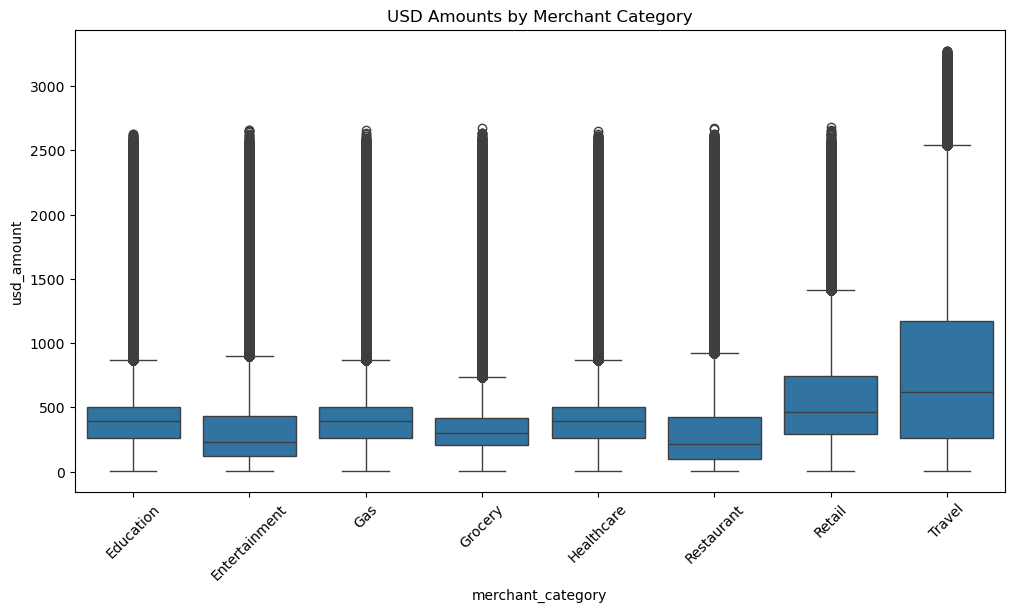

In [17]:
# Checking for outliers
Q1 = df_clean['usd_amount'].quantile(0.25)
Q3 = df_clean['usd_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df_clean[(df_clean['usd_amount'] < lower_bound) | (df_clean['usd_amount'] > upper_bound)]
display(outliers)

# Boxplot for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='merchant_category', y='usd_amount')
plt.xticks(rotation=45)
plt.title('USD Amounts by Merchant Category')
plt.show()


We don't see any outliers at the bottom. This makes sense since they would fall under normal spending habits. Some of these values seem to be excessive. For example, gas prices can hit levels that seem to be too high for a fill up. This may require additional investigation for the data set. For the sake of this project of helping users budget we don't need the extremes. We want to help the user to compare against the normal spending habits.

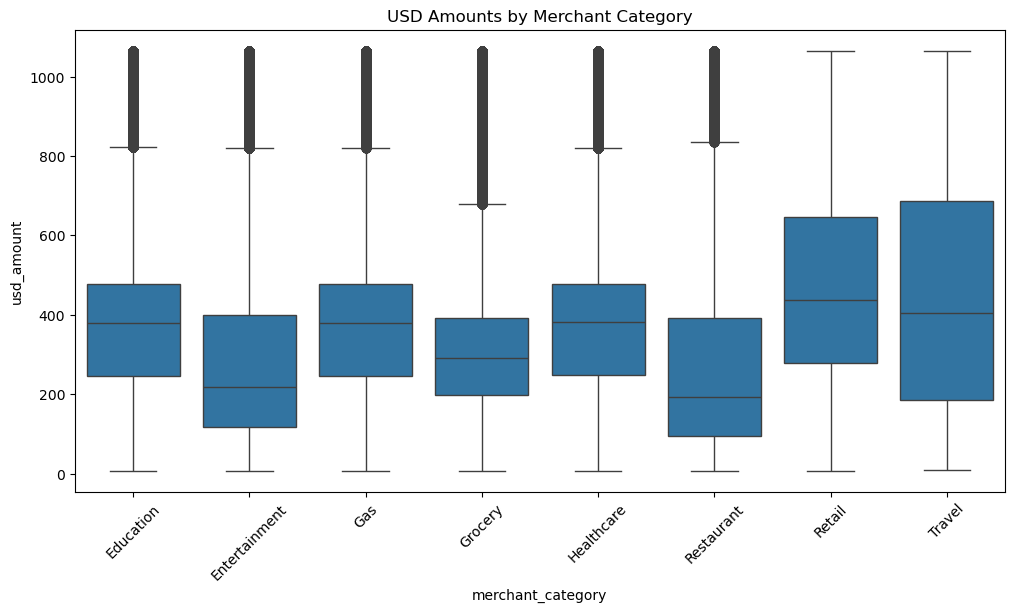

In [18]:
# Dropping the outliers
df_clean = df_clean[(df_clean['usd_amount'] >= lower_bound) & (df_clean['usd_amount'] <= upper_bound)]

# Boxplot after
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='merchant_category', y='usd_amount')
plt.xticks(rotation=45)
plt.title('USD Amounts by Merchant Category')
plt.show()

In [19]:
# Analyzing spending patterns by category.
df_group_category = df_clean.groupby(['merchant_category','country']).agg({
    'usd_amount': ['sum','mean']
}).reset_index()
display(df_group_category.head(30))

C:\Users\mytho\AppData\Local\Temp\ipykernel_51240\3320962646.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group_category = df_clean.groupby(['merchant_category','country']).agg({


merchant_category    country    usd_amount            
                                          sum        mean
0          Education  Australia  2.037768e+07  383.695369
1          Education     Brazil  2.376794e+07  406.463342
2          Education     Canada  2.226245e+07  381.389200
3          Education     France  2.452426e+07  420.663546
4          Education    Germany  2.384572e+07  428.802646
5          Education      Japan  1.992785e+07  338.868625
6          Education     Mexico  2.506294e+07  452.195532
7          Education    Nigeria  1.032997e+07  149.662060
8          Education     Russia  2.299048e+07  400.293851
9          Education  Singapore  2.763379e+07  448.476645
10         Education         UK  2.418679e+07  417.611154
11         Education        USA  2.321504e+07  429.995708
12     Entertainment  Australia  1.504686e+07  279.712690
13     Entertainment     Brazil  1.756543e+07  297.064575
14     Entertainment     Canada  1.614921e+07  273.229242
15     Entertainment     France  1.786976e+07  302.779854
16     Entertainment    Germany  1.753363e+07  311.266308
17     Entertainment      Japan  1.502731e+07  253.578447
18     Entertainment     Mexico  1.806452e+07  322.938164
19     Entertainment    Nigeria  7.936917e+06  114.892912
20     Entertainment     Russia  1.697392e+07  290.743866
21     Entertainment  Singapore  2.063952e+07  326.559184
22     Entertainment         UK  1.783081e+07  303.616830
23     Entertainment        USA  1.696589e+07  310.264540
24               Gas  Australia  2.074411e+07  387.110894
25               Gas     Brazil  2.381824e+07  405.472081
26               Gas     Canada  2.212695e+07  380.829448
27               Gas     France  2.460671e+07  420.361657
28               Gas    Germany  2.376384e+07  426.724066
29               Gas      Japan  2.001283e+07  340.082388

C:\Users\mytho\AppData\Local\Temp\ipykernel_51240\3773400784.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  global_avg = df_group_category.groupby('merchant_category')['mean'].mean()


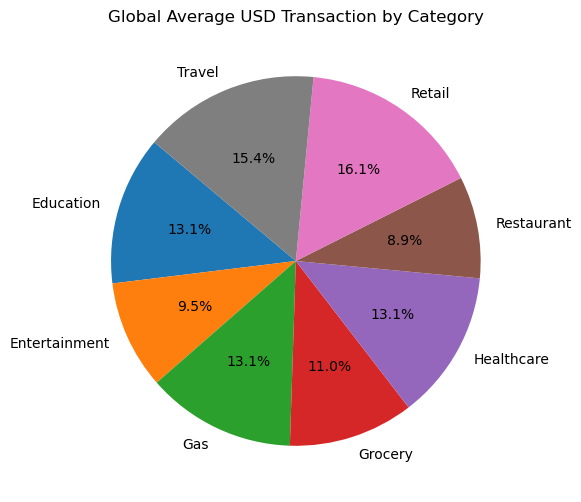

In [20]:
# Graphing the mean of categories.
# Aggregate global average by merchant_category
df_group_category.columns = ['merchant_category', 'country', 'sum', 'mean']

global_avg = df_group_category.groupby('merchant_category')['mean'].mean()

plt.figure(figsize=(6, 6))
plt.pie(global_avg, labels=global_avg.index, autopct='%1.1f%%', startangle=140)
plt.title('Global Average USD Transaction by Category')
plt.show()


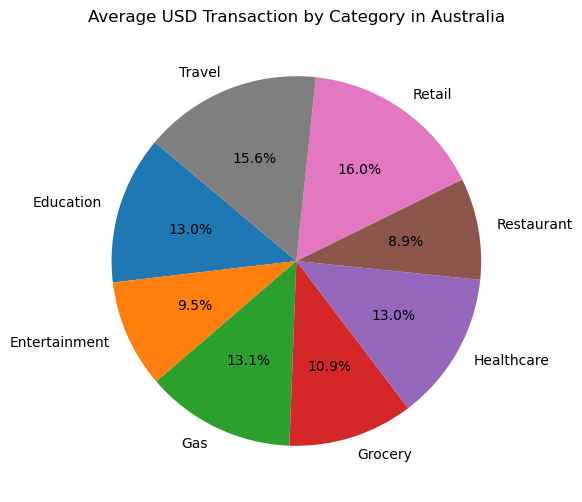

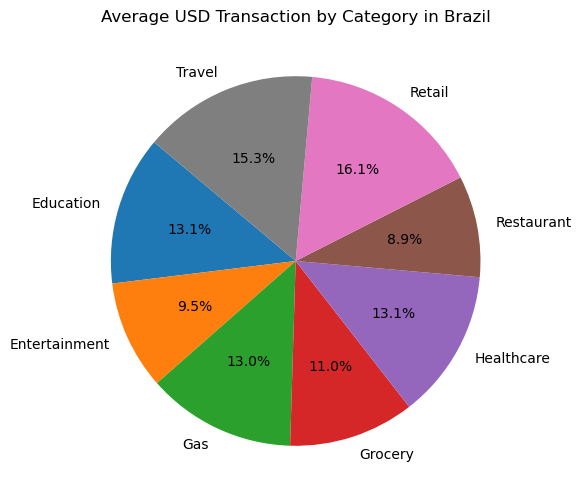

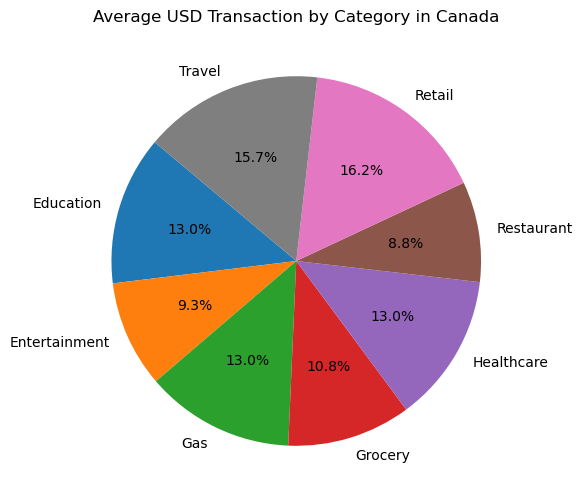

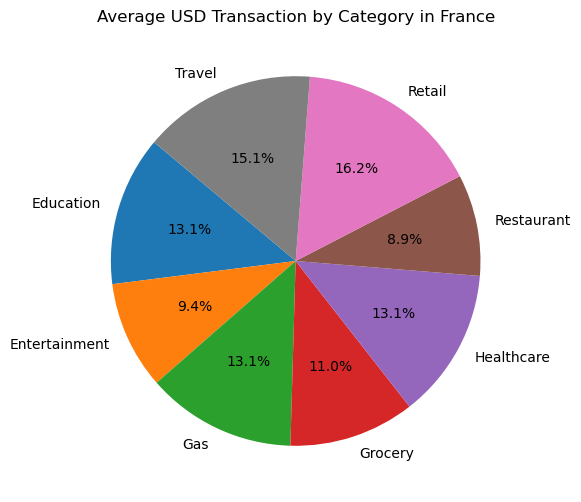

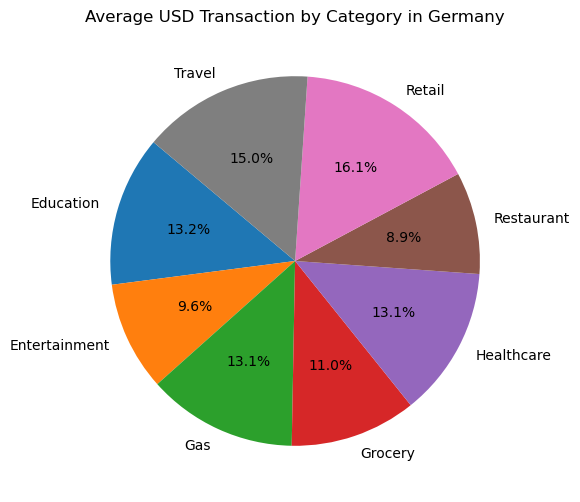

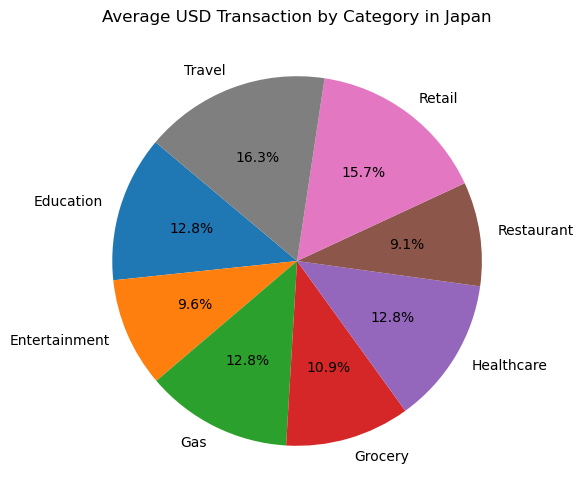

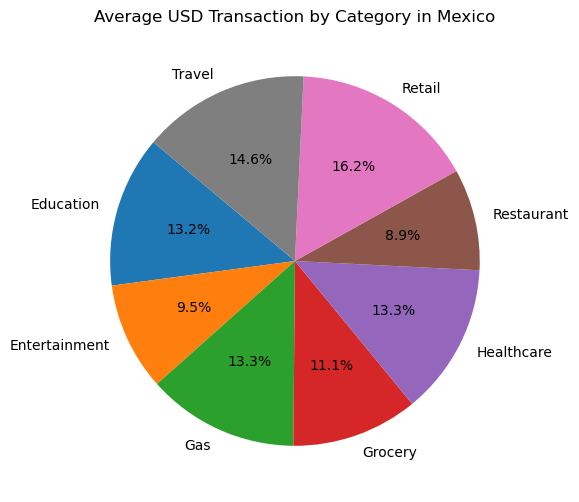

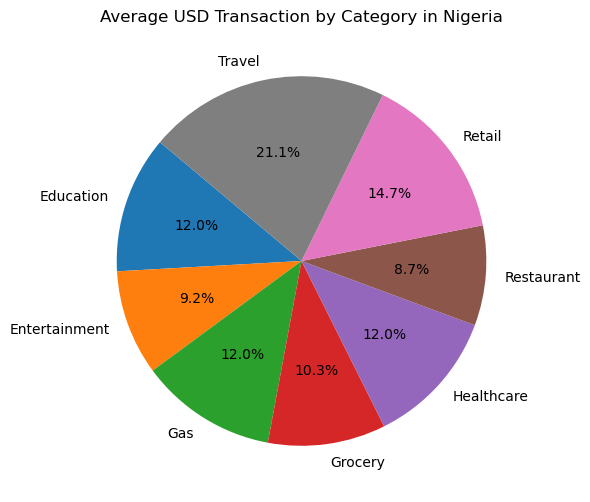

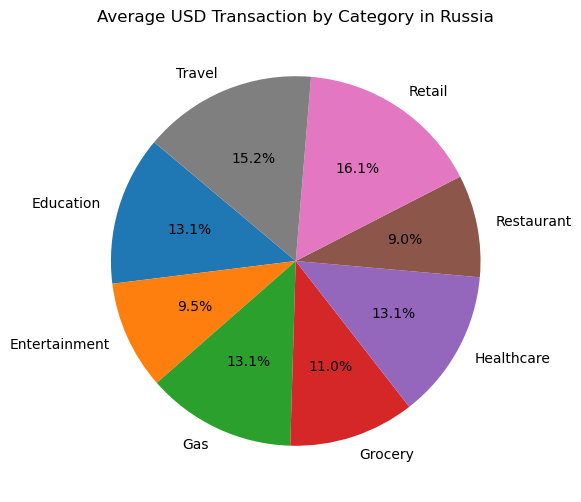

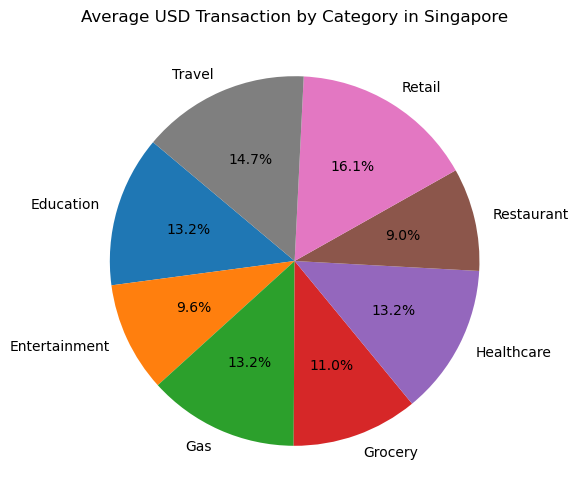

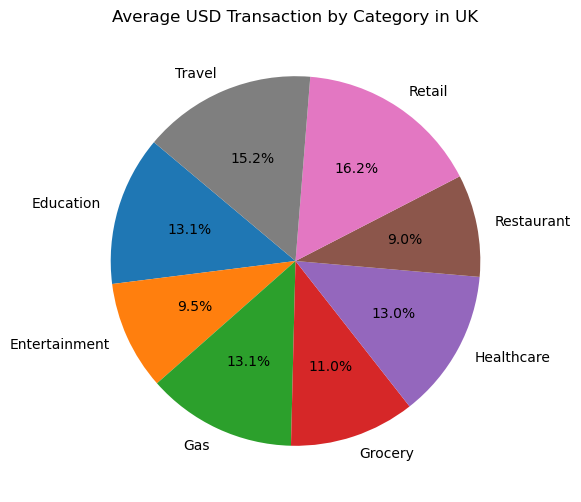

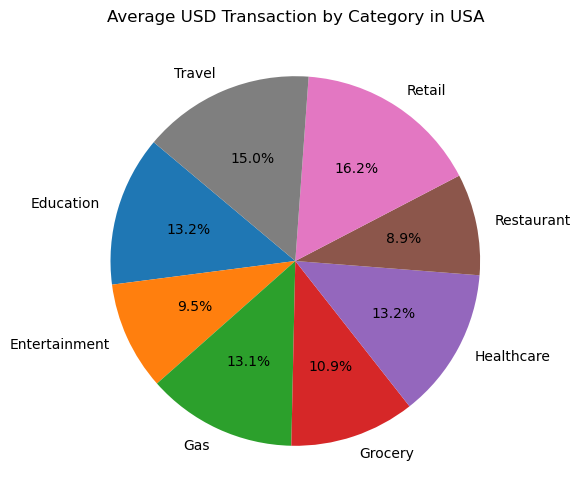

In [21]:
# Averages by country
# Loop through each country and plot pie chart
countries = df_group_category['country'].unique()

for country in countries:
    country_data = df_group_category[df_group_category['country'] == country]
    plt.figure(figsize=(6, 6))
    plt.pie(country_data['mean'], labels=country_data['merchant_category'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Average USD Transaction by Category in {country}')
    plt.show()


When each country is compared to the global average the different categories seem to stack up relatively similarly. Even when compared to Nigeria, there doesn't seem to be a large difference. This may be due to these transactions being conducted through credit card systems. This may speak to a similarity in behavior due to a similar level of development and economic status through out the countries rather than the countries actual average themselves.

In [22]:
# Averages by city size
df_group_cat_city = df_clean.groupby(['merchant_category','city_size']).agg({
    'usd_amount': ['sum','mean']
}).reset_index()
display(df_group_cat_city.head(30))

C:\Users\mytho\AppData\Local\Temp\ipykernel_51240\776335170.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group_cat_city = df_clean.groupby(['merchant_category','city_size']).agg({


merchant_category city_size    usd_amount            
                                         sum        mean
0          Education     large  9.241463e+06  429.995477
1          Education    medium  2.588834e+08  382.633100
2      Entertainment     large  6.738865e+06  310.890628
3      Entertainment    medium  1.908649e+08  278.644674
4                Gas     large  9.309863e+06  428.709866
5                Gas    medium  2.594609e+08  382.678902
6            Grocery     large  7.665324e+06  356.460366
7            Grocery    medium  2.192603e+08  321.765928
8         Healthcare     large  9.300911e+06  430.040253
9         Healthcare    medium  2.599436e+08  383.002164
10        Restaurant     large  6.308650e+06  291.473388
11        Restaurant    medium  1.797168e+08  261.945446
12            Retail     large  1.125759e+07  530.243150
13            Retail    medium  3.109007e+08  469.478263
14            Travel     large  7.718197e+06  491.980910
15            Travel    medium  2.337586e+08  447.099096

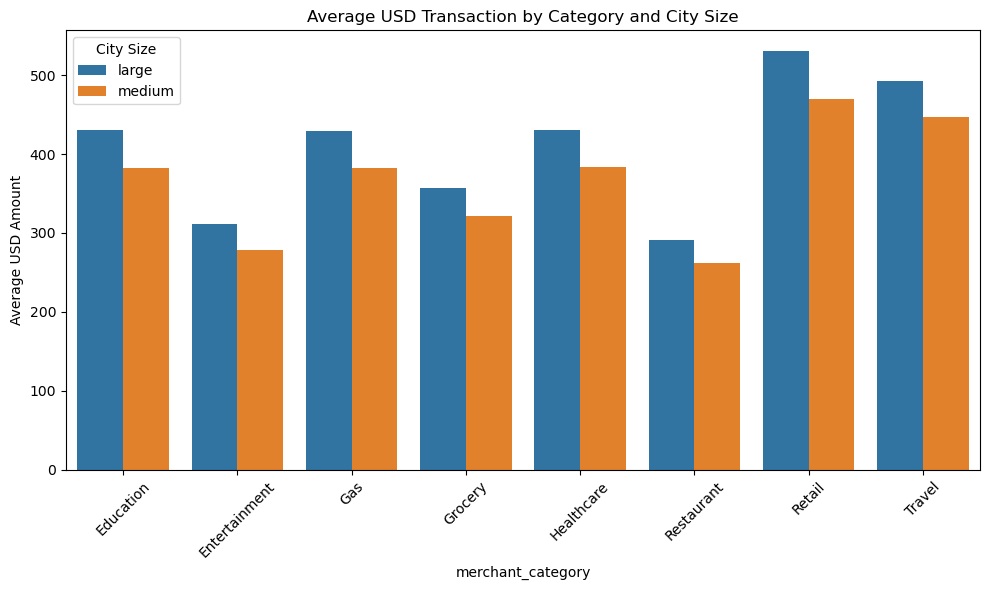

In [23]:
df_group_cat_city.columns = ['merchant_category', 'city_size', 'sum', 'mean']

city_sizes = df_group_cat_city['city_size'].unique()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_group_cat_city, x='merchant_category', y='mean', hue='city_size')
plt.title('Average USD Transaction by Category and City Size')
plt.ylabel('Average USD Amount')
plt.xticks(rotation=45)
plt.legend(title='City Size')
plt.tight_layout()
plt.show()



There is a clear uptick in average expenses between large cities from medium-sized cities. This tracks as most large cities tend to cost around 20% more than less populated areas.

In [24]:
# Averages by month
df_group_cat_month = df_clean.groupby(['merchant_category','month']).agg({
    'usd_amount': ['sum','mean']
}).reset_index()
display(df_group_cat_month.head())

C:\Users\mytho\AppData\Local\Temp\ipykernel_51240\3660878570.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group_cat_month = df_clean.groupby(['merchant_category','month']).agg({


merchant_category month    usd_amount            
                                    sum        mean
0         Education     9  8.613296e+06  384.093485
1         Education    10  2.595116e+08  384.091195
2     Entertainment     9  6.318253e+06  278.226838
3     Entertainment    10  1.912855e+08  279.680509
4               Gas     9  8.670890e+06  382.297518

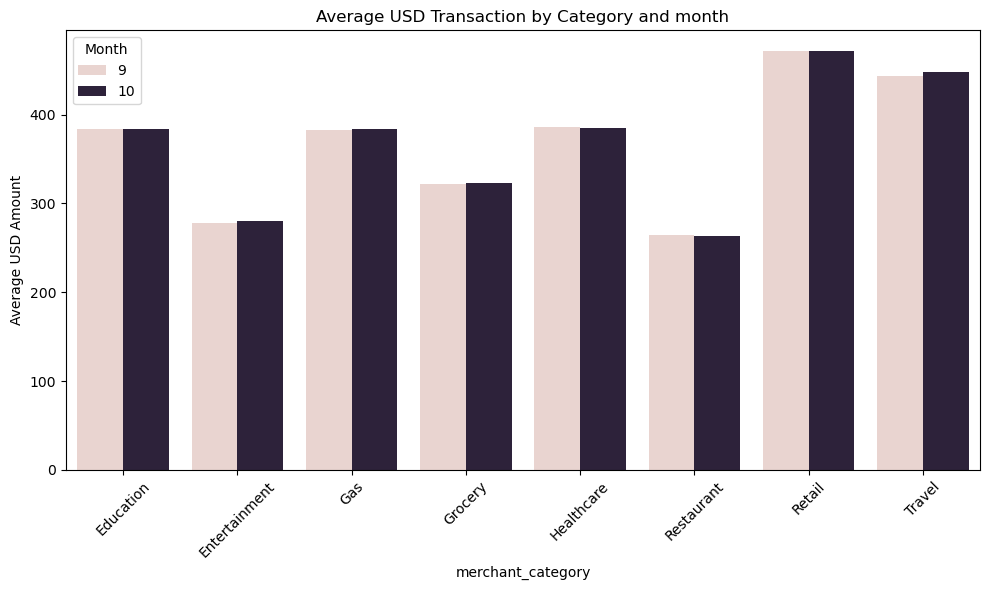

In [25]:
df_group_cat_month.columns = ['merchant_category', 'month', 'sum', 'mean']

months = df_group_cat_month['month'].unique()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_group_cat_month, x='merchant_category', y='mean', hue='month')
plt.title('Average USD Transaction by Category and month')
plt.ylabel('Average USD Amount')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
plt.show()

Average spending per transaction per month doesn't vary much at all.

In [26]:
# We are going to analyze the site now by users, month, and merchant_category, so that we can grab averages for the data.
df_grouped_all = df_clean.groupby(['customer_id','month', 'merchant_category']).agg({
    'usd_amount': ['sum', 'mean', 'count']
}).reset_index()
display(df_grouped_all.head(30))

C:\Users\mytho\AppData\Local\Temp\ipykernel_51240\1482995666.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_all = df_clean.groupby(['customer_id','month', 'merchant_category']).agg({


customer_id month merchant_category    usd_amount                   
                                                 sum         mean count
0   CUST_10000     9         Education   1666.253550   833.126775     2
1   CUST_10000     9     Entertainment   2377.635000   594.408750     4
2   CUST_10000     9               Gas   3998.605544   799.721109     5
3   CUST_10000     9           Grocery   2913.152450   728.288113     4
4   CUST_10000     9        Healthcare   3044.680210   761.170053     4
5   CUST_10000     9        Restaurant   1728.349740   576.116580     3
6   CUST_10000     9            Retail    926.074370   926.074370     1
7   CUST_10000     9            Travel      0.000000          NaN     0
8   CUST_10000    10         Education  70736.705215   752.518141    94
9   CUST_10000    10     Entertainment  63087.519637   624.628907   101
10  CUST_10000    10               Gas  65100.851188   731.470238    89
11  CUST_10000    10           Grocery  62731.601812   712.859112    88
12  CUST_10000    10        Healthcare  69600.350953   800.004034    87
13  CUST_10000    10        Restaurant  61838.397824   600.372794   103
14  CUST_10000    10            Retail  43981.890912   785.390909    56
15  CUST_10000    10            Travel  21167.162625   661.473832    32
16  CUST_10018     9         Education   4154.497750   830.899550     5
17  CUST_10018     9     Entertainment   4273.922033   712.320339     6
18  CUST_10018     9               Gas   3093.671951   773.417988     4
19  CUST_10018     9           Grocery   1344.605375   672.302688     2
20  CUST_10018     9        Healthcare      0.000000          NaN     0
21  CUST_10018     9        Restaurant   2148.063060   537.015765     4
22  CUST_10018     9            Retail   1018.645940  1018.645940     1
23  CUST_10018     9            Travel      0.000000          NaN     0
24  CUST_10018    10         Education  38880.860706   747.708860    52
25  CUST_10018    10     Entertainment  46587.829792   621.171064    75
26  CUST_10018    10               Gas  48179.784107   777.093292    62
27  CUST_10018    10           Grocery  34650.132919   666.348710    52
28  CUST_10018    10        Healthcare  32804.402705   762.893086    43
29  CUST_10018    10        Restaurant  32315.942950   609.734773    53

## Creating a baseline model


In [27]:
# Creating a baseline model
# Grouping user-level monthly spend by category
df_user_month_cat = df_clean.groupby(['customer_id', 'month', 'merchant_category'])['usd_amount'].sum().reset_index()
df_user_month_cat.columns = ['customer_id', 'month', 'merchant_category', 'monthly_spend']

#  Compute the quartiles by category and month
df_category_month_stats = df_user_month_cat.groupby(['month', 'merchant_category'])['monthly_spend'].agg(
    avg_transaction='mean',
    bottom_quartile=lambda x: x.quantile(0.25),
    top_quartile=lambda x: x.quantile(0.75)
).reset_index()

# Add the total row
monthly_totals = df_user_month_cat.groupby(['month', 'customer_id'])['monthly_spend'].sum().groupby('month').agg(
    avg_transaction='mean',
    bottom_quartile=lambda x: x.quantile(0.25),
    top_quartile=lambda x: x.quantile(0.75)
).reset_index()
monthly_totals['merchant_category'] = 'Total'

# Combine category with total lines
df_final = pd.concat([df_category_month_stats, monthly_totals], ignore_index=True)
df_final = df_final[['month', 'merchant_category', 'avg_transaction', 'bottom_quartile', 'top_quartile']]
df_final = df_final.sort_values(by=['month', 'merchant_category']).reset_index(drop=True)
display(df_final)

C:\Users\mytho\AppData\Local\Temp\ipykernel_51240\2869891284.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_user_month_cat = df_clean.groupby(['customer_id', 'month', 'merchant_category'])['usd_amount'].sum().reset_index()
C:\Users\mytho\AppData\Local\Temp\ipykernel_51240\2869891284.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_category_month_stats = df_user_month_cat.groupby(['month', 'merchant_category'])['monthly_spend'].agg(


,month,merchant_category,avg_transaction,bottom_quartile,top_quartile
0,9,Education,1769.007272,899.474940,2393.310335
1,9,Entertainment,1297.649059,588.647934,1729.419375
2,9,Gas,1780.835901,918.471597,2360.061043
3,9,Grocery,1491.247283,711.426631,1993.075616
4,9,Healthcare,1806.868273,924.436516,2439.557376
5,9,Restaurant,1241.937072,521.910000,1705.400000
6,9,Retail,2121.490866,1048.690527,2868.195219
7,9,Total,13077.030579,8797.146068,16210.148500
8,9,Travel,1567.994852,698.426795,2222.127967
9,10,Education,53298.747109,36762.820476,64995.642697


This data set was taken from a Kaggle project to detect fraud. From what I can tell is that the values in month 10 still contain fraudulent transactions. This will is affecting the average score severely. For the sake of our project we will remove all of month 10 transction data and use it to provide smart budgeting app the benchmarks for use on their project. 

In [28]:
df_final = df_final[df_final['month'] != 10].round(2)
display(df_final)

,month,merchant_category,avg_transaction,bottom_quartile,top_quartile
0,9,Education,1769.01,899.47,2393.31
1,9,Entertainment,1297.65,588.65,1729.42
2,9,Gas,1780.84,918.47,2360.06
3,9,Grocery,1491.25,711.43,1993.08
4,9,Healthcare,1806.87,924.44,2439.56
5,9,Restaurant,1241.94,521.91,1705.40
6,9,Retail,2121.49,1048.69,2868.20
7,9,Total,13077.03,8797.15,16210.15
8,9,Travel,1567.99,698.43,2222.13


Here is the JSON object for the project:
{
  "average_spending": {
    "Education": 1769.01,
    "Entertainment": 1297.65,
    "Gas": 1780.84,
    "Grocery": 1941.25,
    "Healthcare": 1806.87,
    "Restaurant": 1241.94,
    "Retail": 2121.49,
    "Travel": 1567.99,
    "Total": 13077.03
  },
  "average_spending_bottom_quartile": {
    "Education": 899.47,
    "Entertainment": 588.65,
    "Gas": 918.47,
    "Grocery": 711.43,
    "Healthcare": 924.44,
    "Restaurant": 521.91,
    "Retail": 1048.69,
    "Travel": 698.43,
    "Total": 8797.15
  },
    "average_spending_top_quartile": {
    "Education": 2393.31,
    "Entertainment": 1729.42,
    "Gas": 2360.06,
    "Grocery": 1993.08,
    "Healthcare": 2439.56,
    "Restaurant": 1705.40,
    "Retail": 2868.20,
    "Travel": 2222.13,
    "Total": 16210.15
  }
}

The file is named benchmark_spending2.json in the project.


## Conclusion

After cleaning the data and prepping it for use with the smart budgeting app. We encountered an underlying issue with the outliers in the data. The data set appears to contain lots of fraud entries that skewed averages in month 10. In order to get the dataset to a usable state, we through out month 10 in order to get more realistic number for the users to compare their spending habits with.

Stretch goals 11/10/2025: I will attempt to try to create a model to predict and exclude all the fraudulent data from month 10. At that point, I can go back and apply and use it to drop out the bad data and reincorporate month 10 to the final data used to benchmark spending. If time permits this will show up after this point. If not, this will be the final conclusion.